# Week 10 Seminar notebook: Multilayer neural networks


Problem 1: Given the weights and the input vector below, write the code to calculate the predicted output value y_hat, assuming the model described in the week 9 lecture.

In [13]:
import numpy as np
weights_0_1=np.array([[-.59,.75,-.95],[.34,-.17,.12],[-.72,-.6,.6]])
weights_1_2=np.array([[.93],[-.37],[.38]])
layer_0 = np.array([[ 0, 1, 1 ]])
layer_1 = np.maximum(np.dot(layer_0,weights_0_1),0)
layer_2 = np.dot(layer_1,weights_1_2)
print(layer_2)

[[0.2736]]


Problem 2: Given the true label y=1, and the learning rate as specified below, write the code to perform the backwards pass and update the weights.

In [11]:
true_label = np.array([[1]])
learning_rate=0.2
layer_2_diff = (layer_2 - true_label)
layer_1_delta=np.zeros((3,3))

layer_1_delta[0,0]=layer_2_diff*weights_1_2[0]*(layer_1[0,0]>0)*layer_0[0,0]
layer_1_delta[0,1]=layer_2_diff*weights_1_2[1]*(layer_1[0,1]>0)*layer_0[0,0]
layer_1_delta[0,2]=layer_2_diff*weights_1_2[2]*(layer_1[0,2]>0)*layer_0[0,0]

layer_1_delta[1,0]=layer_2_diff*weights_1_2[0]*(layer_1[0,0]>0)*layer_0[0,1]
layer_1_delta[1,1]=layer_2_diff*weights_1_2[1]*(layer_1[0,1]>0)*layer_0[0,1]
layer_1_delta[1,2]=layer_2_diff*weights_1_2[2]*(layer_1[0,2]>0)*layer_0[0,1]

layer_1_delta[2,0]=layer_2_diff*weights_1_2[0]*(layer_1[0,0]>0)*layer_0[0,2]
layer_1_delta[2,1]=layer_2_diff*weights_1_2[1]*(layer_1[0,1]>0)*layer_0[0,2]
layer_1_delta[2,2]=layer_2_diff*weights_1_2[2]*(layer_1[0,2]>0)*layer_0[0,2]




weights_0_1[0,0] -= learning_rate * layer_1_delta[0,0]
weights_0_1[0,1] -= learning_rate * layer_1_delta[0,1]
weights_0_1[0,2] -= learning_rate * layer_1_delta[0,2]
weights_0_1[1,0] -= learning_rate * layer_1_delta[1,0]
weights_0_1[1,1] -= learning_rate * layer_1_delta[1,1]
weights_0_1[1,2] -= learning_rate * layer_1_delta[1,2]
weights_0_1[2,0] -= learning_rate * layer_1_delta[2,0]
weights_0_1[2,1] -= learning_rate * layer_1_delta[2,1]
weights_0_1[2,2] -= learning_rate * layer_1_delta[2,2]


weights_1_2[0] -= (learning_rate * (layer_1[0,0]*layer_2_diff))[0]
weights_1_2[1] -= (learning_rate * (layer_1[0,1]*layer_2_diff))[0]
weights_1_2[2] -= (learning_rate * (layer_1[0,2]*layer_2_diff))[0]

print(weights_0_1)
print(weights_1_2)

[[-0.59       0.75      -0.95     ]
 [ 0.34      -0.17       0.1752064]
 [-0.72      -0.6        0.6552064]]
[[ 0.93     ]
 [-0.37     ]
 [ 0.4846016]]


A more succinct version

In [ ]:
true_label = np.array([[1]])
learning_rate=0.2
layer_2_diff = (layer_2 - true_label)

layer_1_delta = (weights_1_2*layer_2_diff)*(layer_1>0).T*layer_0


weights_0_1 -= learning_rate*layer_1_delta.T


weights_1_2 -= learning_rate * (layer_1*layer_2_diff).T


print(weights_0_1)
print(weights_1_2)

Problem 3. Given the training data below, complete the code to train the network to solve the problem. You can use the code in the block below the training block to test that the models predictions from the training inputs are approximately correct.

In [14]:
inputs = np.array( [[ 0, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 1, 0, 1 ],
                          [ 1, 1, 1 ] ] )

true_labels = np.array([ [0], [1], [1], [0]])

Text(0, 0.5, 'loss')

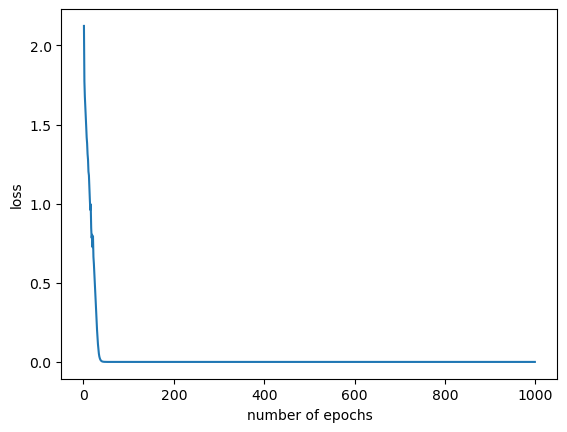

In [15]:
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.35
num_features=3
hidden_size = 3
np.random.seed(1)
weights_0_1 = np.random.rand(num_features,hidden_size)
np.random.seed(1)
weights_1_2 = np.random.rand(hidden_size,1)
loss = []
n_iters=1000
for iteration in range(n_iters):
   layer_2_error = 0
   for i in range(len(inputs)):
      layer_0 = inputs[i]

      ## Add forward pass
      layer_1 = np.maximum(np.dot(layer_0,weights_0_1),0)
      layer_2 = np.dot(layer_1,weights_1_2)


      ## Add backward pass and update weights
      layer_2_error+=np.sum((layer_2-true_labels[i])**2)

      layer_2_diff = (layer_2 - true_labels[i])

      layer_1_delta=np.zeros((3,3))
      layer_1_delta[0,0]=layer_2_diff*weights_1_2[0]*(layer_1[0]>0)*layer_0[0]
      layer_1_delta[0,1]=layer_2_diff*weights_1_2[1]*(layer_1[1]>0)*layer_0[0]
      layer_1_delta[0,2]=layer_2_diff*weights_1_2[2]*(layer_1[2]>0)*layer_0[0]

      layer_1_delta[1,0]=layer_2_diff*weights_1_2[0]*(layer_1[0]>0)*layer_0[1]
      layer_1_delta[1,1]=layer_2_diff*weights_1_2[1]*(layer_1[1]>0)*layer_0[1]
      layer_1_delta[1,2]=layer_2_diff*weights_1_2[2]*(layer_1[2]>0)*layer_0[1]

      layer_1_delta[2,0]=layer_2_diff*weights_1_2[0]*(layer_1[0]>0)*layer_0[2]
      layer_1_delta[2,1]=layer_2_diff*weights_1_2[1]*(layer_1[1]>0)*layer_0[2]
      layer_1_delta[2,2]=layer_2_diff*weights_1_2[2]*(layer_1[2]>0)*layer_0[2]

      weights_0_1[0,0] -= learning_rate * layer_1_delta[0,0]
      weights_0_1[0,1] -= learning_rate * layer_1_delta[0,1]
      weights_0_1[0,2] -= learning_rate * layer_1_delta[0,2]
      weights_0_1[1,0] -= learning_rate * layer_1_delta[1,0]
      weights_0_1[1,1] -= learning_rate * layer_1_delta[1,1]
      weights_0_1[1,2] -= learning_rate * layer_1_delta[1,2]
      weights_0_1[2,0] -= learning_rate * layer_1_delta[2,0]
      weights_0_1[2,1] -= learning_rate * layer_1_delta[2,1]
      weights_0_1[2,2] -= learning_rate * layer_1_delta[2,2]

      weights_1_2[0] -= (learning_rate * (layer_1[0]*layer_2_diff))
      weights_1_2[1] -= (learning_rate * (layer_1[1]*layer_2_diff))
      weights_1_2[2] -= (learning_rate * (layer_1[2]*layer_2_diff))


   loss.append(layer_2_error)
plt.plot(range(1,n_iters),loss[1:])
plt.xlabel("number of epochs")
plt.ylabel("loss")

You can view the results as follows

In [16]:
np. set_printoptions(suppress=True)
for k in range(4):
  layer_0 = inputs[k]
  layer_1 = np.maximum(np.dot(layer_0,weights_0_1),0)
  layer_2 = np.dot(layer_1,weights_1_2)
  print(layer_2)

[0.]
[1.]
[1.]
[0.]


Problem 4: Once you have a model that makes good predictions, try lowering the learning rate. What do you notice? Why do you think this happens?

Problem 5. Examine the weights in your model. Give a verbal explanation of why they give the correct answer to the XOR problem